In [1]:
#    Input variables: Biến đầu vào ( dự liệu đầu vào x)
#    # bank client data: dự liệu khách hàng
#    1 - age (numeric) : Tuổi
#    2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown") : Loại công việc
#    3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed) : Tình trạng hôn nhân
#    4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown") : Trình độ giáo dục
#    5 - default: has credit in default? (categorical: "no","yes","unknown") : tình trạng vỡ nợ tín dụng
#    6 - housing: has housing loan? (categorical: "no","yes","unknown") : Khoản Vay Nhà Ở ( vay mua nhà)
#    7 - loan: has personal loan? (categorical: "no","yes","unknown") : Vay cá nhân
#    # related with the last contact of the current campaign: liên quan đến người liên hệ cuối cùng của chiến dịch hiện tại
#    8 - contact: contact communication type (categorical: "cellular","telephone") : Loại liên hệ
#    9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") : tháng liên hệ cuối cùng của năm
#   10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri") : Ngày liên hệ cuối cùng trong tuần
#   11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#   thời lượng: thời lượng liên hệ cuối cùng, tính bằng giây (số). Lưu ý quan trọng: thuộc tính này ảnh hưởng nhiều đến mục tiêu đầu ra (ví dụ: nếu thời lượng = 0 thì y = "không"). Tuy nhiên, thời lượng không được biết trước khi thực hiện cuộc gọi. Ngoài ra, sau khi kết thúc cuộc gọi, y hiển nhiên được biết đến. Do đó, đầu vào này chỉ nên được đưa vào cho mục đích chuẩn và nên bị loại bỏ nếu mục đích là có một mô hình dự đoán thực tế.
#    # other attributes: các thuộc tính khác
#   12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) chiến dịch: số lượng liên hệ được thực hiện trong chiến dịch này và cho khách hàng này (số, bao gồm liên hệ cuối cùng)
#   13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) pdays: số ngày trôi qua sau khi khách hàng được liên hệ lần cuối từ một chiến dịch trước đó (số; 999 có nghĩa là khách hàng chưa được liên hệ trước đó)
#   14 - previous: number of contacts performed before this campaign and for this client (numeric) trước: số lượng địa chỉ liên hệ được thực hiện trước chiến dịch này và cho khách hàng này (số)
#   15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success") poutcome: kết quả của chiến dịch tiếp thị trước đó (phân loại: "thất bại", "không tồn tại", "thành công")
#    # social and economic context attributes : thuộc tính bối cảnh xã hội và kinh tế
#   16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) : tỷ lệ thay đổi việc làm - chỉ báo hàng quý (số)
#   17 - cons.price.idx: consumer price index - monthly indicator (numeric)    : cons.price.idx: chỉ số giá tiêu dùng - chỉ báo hàng tháng (số)
#   18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     : cons.conf.idx: chỉ số niềm tin của người tiêu dùng - chỉ số hàng tháng (số)
#   19 - euribor3m: euribor 3 month rate - daily indicator (numeric) : euribor3m: lãi suất euribor 3 tháng - chỉ báo hàng ngày (số)
#   20 - nr.employed: number of employees - quarterly indicator (numeric) : nr.employed: số lượng nhân viên - chỉ số hàng quý (số)

#   Output variable (desired target): Biến đầu ra (mục tiêu mong muốn):
#   21 - y - has the client subscribed a term deposit? (binary: "yes","no") y - khách hàng đã đăng ký tiền gửi có kỳ hạn chưa? (nhị phân: "yes", "no")

# 8. Missing Attribute Values: There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 
# Thiếu giá trị thuộc tính: Có một số giá trị bị thiếu trong một số thuộc tính phân loại, tất cả đều được mã hóa bằng nhãn "không xác định". Các giá trị bị thiếu này có thể được coi là một nhãn lớp khả thi hoặc sử dụng các kỹ thuật xóa hoặc gán.

### 1. Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression# Sử dụng mô hình hồi quy logistic cho bài toán phân loại
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler
import xgboost as xgb

### 2. Đọc dữ liệu từ file csv

In [3]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### 3. Tiền xử lý dữ liệu

#### 3.1 Xoá các bản ghi bị thiếu dữ liệu

In [5]:
data = data.dropna() # xoá dự liệu khuyết thiếu
print(data.shape) # in ra kích cỡ
print(list(data.columns)) # in ra tên các cột
# dự liệu không có bị khuyết thiếu

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


#### 3.2 Thay thế các giá trị basic.4y', 'basic.6y', 'basic.9y' thành Basic

In [6]:
data['education'].unique() # lấy ra các giá trị duy nhất không bị trùng lặp

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [7]:
# Thay thế các giá trị basic.4y', 'basic.6y', 'basic.9y' thành Basic
data['education']=np.where(data['education'] =='basic.9y','Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y','Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y','Basic', data['education'])
data['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

#### 3.3 Kiểm tra value counts cột y

In [8]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

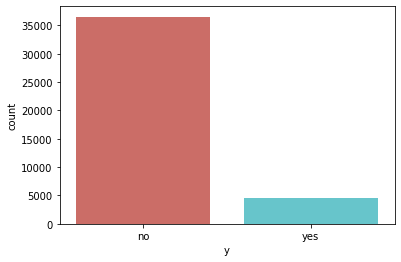

<Figure size 432x288 with 0 Axes>

In [9]:
# biểu đồ số lượng cột y
sns.countplot(x='y', data=data, palette='hls')
plt.show()
plt.savefig('count_plot');
# đây là bài toán phân loại dữ liệu mất cân bằng, phần đa số thuộc về no và thiểu số là yes

In [10]:
count_no_sub = len(data[data['y']=='no']) # số lượng không được đăng kí = len của cột y với các giá trị no
count_sub = len(data[data['y']=='yes']) # số lượng được đăng kí = len của cột y với các giá trị yes
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub) # phần trăm số lượng no/(no+yes)
print("Subscribed", pct_of_no_sub*100) # in ra phần trăm no_sub
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Didn't Subscribe", pct_of_sub*100) # in ra phần trăm sub

Subscribed 88.73458288821988
Didn't Subscribe 11.265417111780131


#### 4. Tính trung bình các nhóm dữ liệu theo y

In [11]:
# tính trung bình các nhóm dữ liệu theo y
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [12]:
# tính trung bình các nhóm dữ liệu theo job
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [13]:
# tính trung bình các nhóm dữ liệu theo tình trạng hôn nhân
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750


In [14]:
# tính trung bình các nhóm dữ liệu theo trình độ giáo d
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


Text(0, 0.5, 'Purchase Frequency')

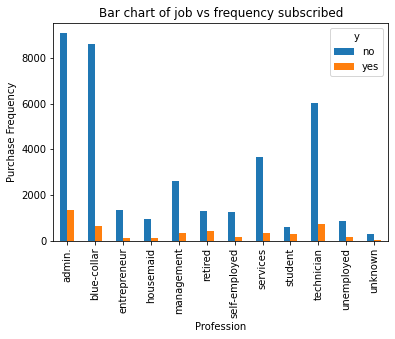

In [15]:
# tạo bảng chéo giữa job và y
pd.crosstab(data.job, data.y).plot(kind='bar') 
plt.title("Bar chart of job vs frequency subscribed") 
plt.xlabel("Profession")
plt.ylabel("Purchase Frequency")
# biểu dồ thể hiện tần suất đăng kí hoặc không đăng kí đối với các loại công việc

Text(0, 0.5, 'Purchase Frequency')

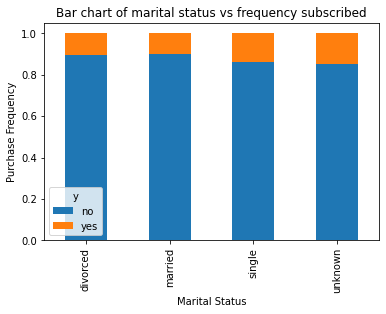

In [16]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of marital status vs frequency subscribed")
plt.xlabel("Marital Status")
plt.ylabel("Purchase Frequency")
# biểu dồ thể hiện tần suất đăng kí hoặc không đăng kí đối với tình trạng hôn nhân

Text(0, 0.5, 'Purchase Frequency')

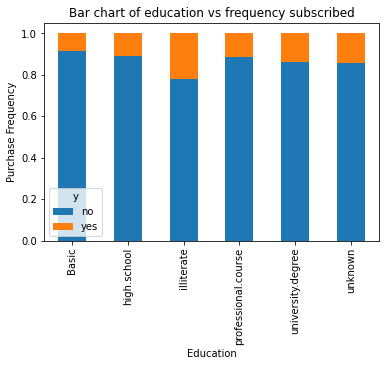

In [17]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of education vs frequency subscribed")
plt.xlabel("Education")
plt.ylabel("Purchase Frequency")
# biểu dồ thể hiện tần suất đăng kí hoặc không đăng kí đối với trình độ giáo dục

Text(0, 0.5, 'Purchase Frequency')

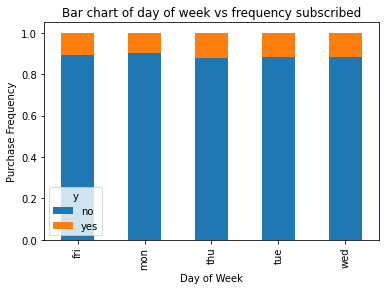

In [18]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of day of week vs frequency subscribed")
plt.xlabel("Day of Week")
plt.ylabel("Purchase Frequency")
# biểu dồ thể hiện tần suất đăng kí hoặc không đăng kí đối với ngày trong tuần

Text(0, 0.5, 'Purchase Frequency')

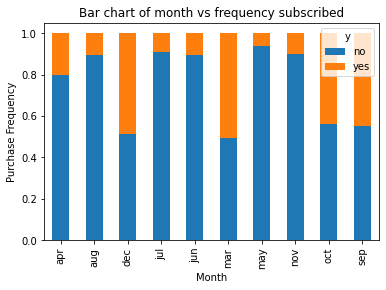

In [19]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of month vs frequency subscribed")
plt.xlabel("Month")
plt.ylabel("Purchase Frequency")
# biểu dồ thể hiện tần suất đăng kí hoặc không đăng kí đối với các tháng

Text(0, 0.5, 'Purchase Frequency')

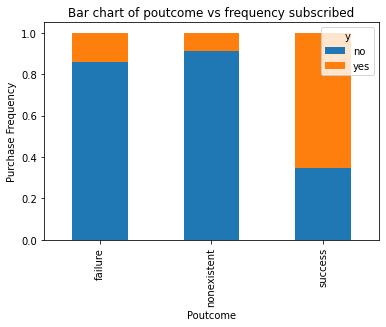

In [20]:
table = pd.crosstab(data.poutcome, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart of poutcome vs frequency subscribed")
plt.xlabel("Poutcome")
plt.ylabel("Purchase Frequency")
# biểu dồ thể hiện tần suất đăng kí hoặc không đăng kí đối với kết quả của chiến dịch tiếp thị

### 5. Chuẩn hoá dữ liệu

#### 5.1 Dummy dữ liệu phân loại

In [21]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
print(cat_list)
# dummy dữ liệu định dang và phân loại

       poutcome_failure  poutcome_nonexistent  poutcome_success
0                     0                     1                 0
1                     0                     1                 0
2                     0                     1                 0
3                     0                     1                 0
4                     0                     1                 0
...                 ...                   ...               ...
41183                 0                     1                 0
41184                 0                     1                 0
41185                 0                     1                 0
41186                 0                     1                 0
41187                 1                     0                 0

[41188 rows x 3 columns]


In [22]:
cat_vars=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final = data[to_keep]
data_final.columns.values
# tạo ra bộ dữ liệu cuối cùng với toàn bộ các cột đã được dummy

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [23]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  object 
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

#### 5.2 Sử dụng SMOTE để cân bằng dữ liệu

In [25]:
X = data_final.loc[:, data_final.columns != 'y'] # feature
y = data_final.loc[:, data_final.columns == 'y'] # target
os = SMOTE(random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # chia tập dữ liệu
columns = X_train.columns
os_data_X, os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y, columns=['y'])

print("Amount of data after oversampled", len(os_data_X)) # Lượng dữ liệu sau khi lấy mẫu quá mức
print("Number of unsubscribed data after being oversampled", len(os_data_y[os_data_y['y']=='no'])) # Số lượng dữ liệu chưa được đăng ký sau khi được lấy mẫu quá mức
print("The number of subscribed data after being oversampled", len(os_data_y[os_data_y['y']=='yes'])) # Số lượng dữ liệu đã đăng ký sau khi được lấy mẫu quá mức
print("Proportion of unsubscribed data after oversampling", len(os_data_y[os_data_y['y']=='no'])/len(os_data_X)) # Tỷ lệ dữ liệu chưa được đăng ký sau khi lấy mẫu quá mức
print("Proportion of subscribers to the data after it is oversampled", len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X)) # Tỷ lệ người đăng ký nhận dữ liệu sau khi dữ liệu được lấy mẫu quá mức
# tỉ tệ đăng kí và chưa đăng kí được cân bằng với nhau

AttributeError: 'NoneType' object has no attribute 'split'